# This is Computer Vision's Assignment 2 
# Submitted by : 
#                               Mina Wagdi Fikri
# ID :                     
#                                    14p8053

CODE

In [212]:
import warnings
import sys
import numpy as np
from skimage import data , io , filters,color
%matplotlib inline

In [213]:
def isLarger(rCenter,cCenter,window):
    for r in range(0,window.shape[0]-1):
        for c in range(0,window.shape[1]-1):
            if r==rCenter and c==cCenter:
                continue
            elif window[rCenter,cCenter]<window[r,c]:
                return 0
    return 1

In [214]:
def get3x3Window(rCenter,cCenter,image):
    window = image[rCenter-1:rCenter+2, cCenter-1:cCenter+2]
    return window

In [215]:
def applyNonMaxSuppresion(img):
    R = img.shape[0]
    C = img.shape[1]
    for r in range(2,R-2):
        for c in range(2,C-2):
            neighboursWindow=get3x3Window(r,c,img)
            if isLarger(1,1,neighboursWindow)==1 :
                continue
            else :
                img[r][c]=0
            
    return img        

In [216]:
def mergeImg(image , cornerImage):
    image = color.gray2rgb(image)
    for i in range(0,image.shape[0]-1):
        for j in range(0,image.shape[1]-1):
            if cornerImage[i][j]==0:
                continue
            else:
                image[i][j]=[255,0,0]
    return image

In [217]:
def getDiffSquared(mainWindow,window):
    value=0
    for i in range(0,3):
        for j in range(0,3):
            value+=(int(mainWindow[i][j])-int(window[i][j]))**2
    return value

In [218]:
def CalculateCornerness(r,c, image):
    vector = np.zeros(8,dtype=np.uint32)
    vectorIndex = 0
    mainWindow = get3x3Window(r,c,image)
    for i in range(-1,2):
        for j in range(-1,2):
            if i == 0 and j == 0:
                continue
            else :
                window = get3x3Window(r+i,c+j,image)
                value=np.uint32()
                value =getDiffSquared(mainWindow,window)
                vector[vectorIndex]=value
                vectorIndex+=1
    minimumValue=np.amin(vector)
    return minimumValue       

In [219]:
def applyMoravec(image,threshold):
    R = image.shape[0]
    C = image.shape[1]
    CornerImage=np.zeros((R,C),dtype=np.uint32)
    #ba-loop 3ala kol cell fel soora
    for r in range(2,R-2) : 
        for c in range(2,C-2) :
            #hena ana weselt lel cell fa ha7seb el cornerness beta3etha
            cornerness = CalculateCornerness(r,c,image)
            if cornerness>threshold:
                CornerImage[r][c]=cornerness
            else:
                CornerImage[r][c]=0
    return CornerImage

# SHOW THE INITIAL IMAGE 

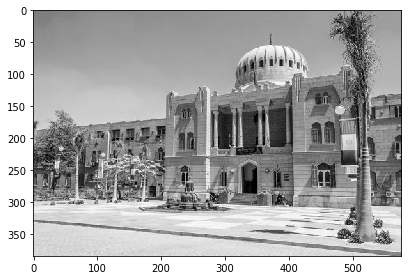

In [220]:
#main
img =io.imread('Engineering.jpg')
io.imshow(img)         

# APPLY MORAVEC with 2000 threshold

In [221]:
MoravecImage2000 = applyMoravec(img,2000)

/Users/minarafla/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


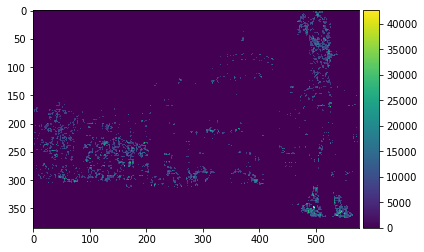

In [222]:
io.imshow(MoravecImage)

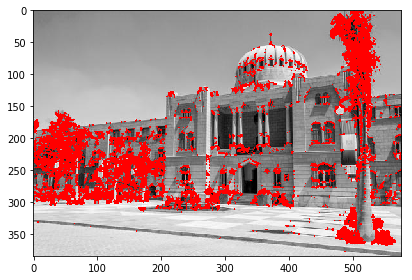

In [223]:
FinalImage = mergeImg(img,MoravecImage2000)
io.imshow(FinalImage)

# APPLY MORAVEC with 4000 threshold

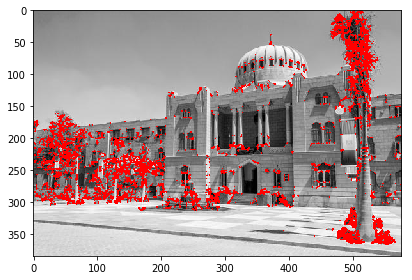

In [224]:
MoravecImage4000 = applyMoravec(img,4000)
FinalImage = mergeImg(img,MoravecImage4000)
io.imshow(FinalImage)

# APPLY MORAVEC with 6000 threshold

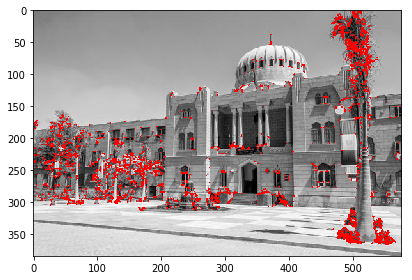

In [225]:
MoravecImage6000 = applyMoravec(img,6000)
FinalImage = mergeImg(img,MoravecImage6000)
io.imshow(FinalImage)

# APPLY NON MAXIMAL SUPPRESSION 2000 threshold

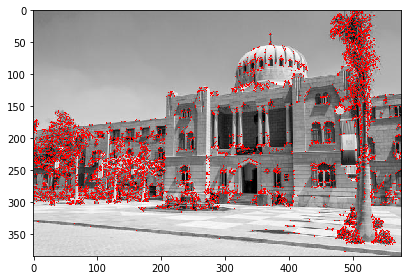

In [226]:
nonmaxsuppImg2000=applyNonMaxSuppresion(MoravecImage2000)
io.imshow(mergeImg(img,nonmaxsuppImg2000))

# APPLY NON MAXIMAL SUPPRESSION 4000 threshold

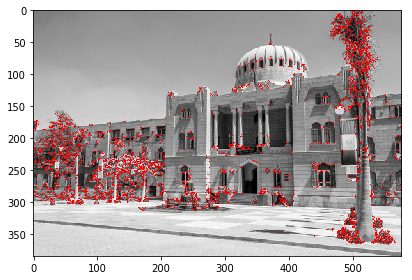

In [227]:
nonmaxsuppImg4000=applyNonMaxSuppresion(MoravecImage4000)
io.imshow(mergeImg(img,nonmaxsuppImg4000))

# APPLY NON MAXIMAL SUPPRESSION 6000 threshold

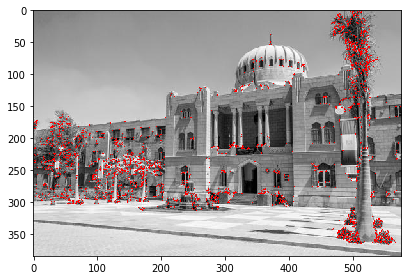

In [228]:
nonmaxsuppImg6000=applyNonMaxSuppresion(MoravecImage6000)
io.imshow(mergeImg(img,nonmaxsuppImg6000))

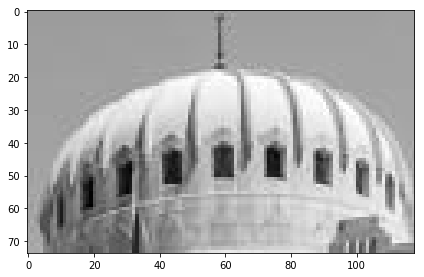

In [229]:
#main
img =io.imread('Engineering2.jpg')
io.imshow(img)

# Apply moravec with threshold 2000

/Users/minarafla/anaconda3/lib/python3.6/site-packages/skimage/io/_plugins/matplotlib_plugin.py:74: UserWarning: Low image data range; displaying image with stretched contrast.
  warn("Low image data range; displaying image with "


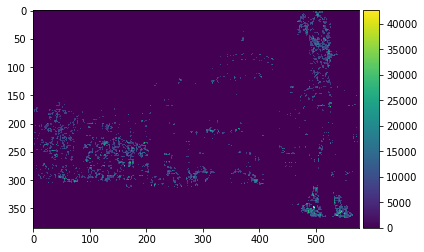

In [230]:
MoravecImage2000 = applyMoravec(img,2000)
io.imshow(MoravecImage)

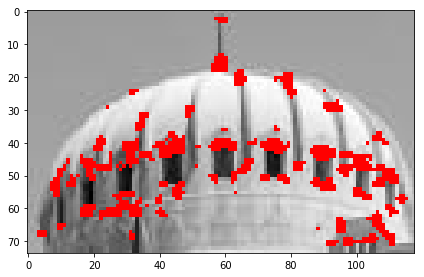

In [231]:
FinalImage = mergeImg(img,MoravecImage2000)
io.imshow(FinalImage)

# Apply moravec with threshold 4000

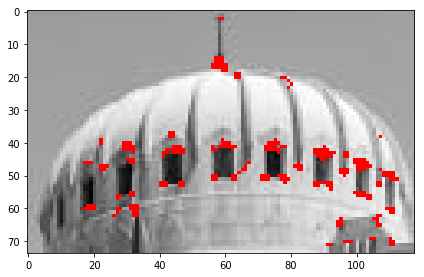

In [232]:
MoravecImage4000 = applyMoravec(img,4000)
FinalImage = mergeImg(img,MoravecImage4000)
io.imshow(FinalImage)

# Apply moravec with threshold 6000

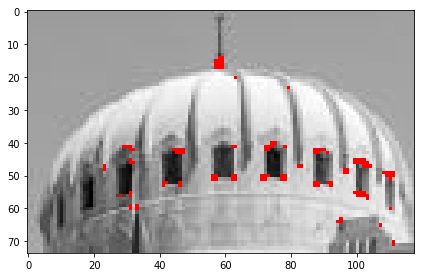

In [233]:
MoravecImage6000 = applyMoravec(img,6000)
FinalImage = mergeImg(img,MoravecImage6000)
io.imshow(FinalImage)

# Apply non maximal suppression with threshold 2000

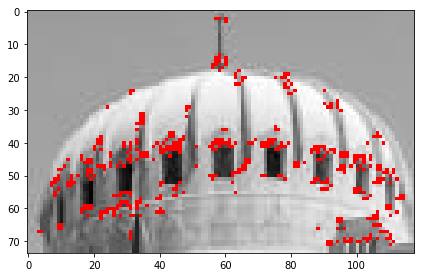

In [234]:
nonmaxsuppImg2000=applyNonMaxSuppresion(MoravecImage2000)
io.imshow(mergeImg(img,nonmaxsuppImg2000))

# Apply non maximal suppression with threshold 4000

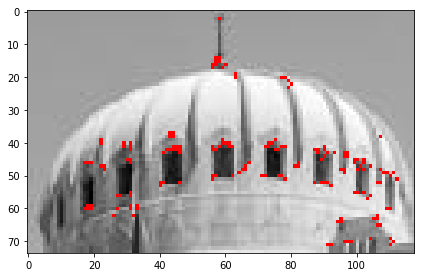

In [235]:
nonmaxsuppImg4000=applyNonMaxSuppresion(MoravecImage4000)
io.imshow(mergeImg(img,nonmaxsuppImg4000))

# Apply non maximal suppression with threshold 6000

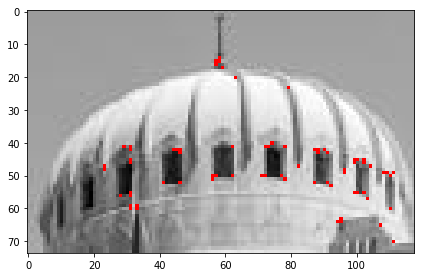

In [236]:
nonmaxsuppImg6000=applyNonMaxSuppresion(MoravecImage6000)
io.imshow(mergeImg(img,nonmaxsuppImg6000))

# COMMENT

Using suppression reduces the number of corner points , keeps the corner pixels with the heighest value of cornerness. It detects the corners more accurately. 